In [1]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',35)
import warnings
warnings.filterwarnings("ignore")

In [3]:
train_path = r'D:\nlp\nlp_代码作业数据\datawhale14天\datawhale_tianchi-master\raw_data\train_null_filtered.csv'
test_path = r'D:\nlp\nlp_代码作业数据\datawhale14天\datawhale_tianchi-master\raw_data\test_data.csv'

In [21]:
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

In [12]:
train_data.head()

,Unnamed: 0,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,offerType,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,age,age_bin,price_brand_gp_median,price_brand_gp_mean,brand_gp_size,price_brand_gp_std,price_brand_gp_max,price_brand_gp_min,price_bodyType_gp_median,price_bodyType_gp_mean,bodyType_gp_size,price_bodyType_gp_std,price_bodyType_gp_max,price_bodyType_gp_min
0,0,0,736,20040402,30.0,6,1.0,0.0,0.0,60.0,12.5,0.0,1046,0,0,20160404,1850,43.357796,3.966344,0.050257,2.159744,1.143786,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762,12,2.0,1800.0,3607.928375,10206,4650.025544,40950,13,1600,2790.191765,35241,3159.663046,99999,12
1,1,1,2262,20030301,40.0,1,2.0,0.0,0.0,140.0,15.0,2.0,4366,0,0,20160309,3600,45.305273,5.236112,0.137925,1.380657,-1.422165,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522,13,2.0,6499.0,9272.585414,13780,9363.917624,99900,15,3500,5820.259655,30294,6320.798831,69900,15
2,2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163.0,12.5,0.0,2806,0,0,20160402,6222,45.978359,4.823792,1.319524,-0.998467,-0.996911,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963,12,2.0,8500.0,9858.582990,1458,5425.058140,45000,100,1600,2790.191765,35241,3159.663046,99999,12
3,3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193.0,15.0,0.0,434,0,0,20160312,2400,45.687478,4.492574,-0.050616,0.883600,-2.228079,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699,20,4.0,5400.0,8449.322819,14234,8916.556379,98000,15,3480,6013.455822,41378,6978.419323,98000,13
4,4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68.0,5.0,0.0,6977,0,0,20160313,5200,44.383511,2.031433,0.572169,-1.571239,2.246088,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482,4,0.0,2300.0,3306.375375,4662,3344.689763,31500,20,1600,2790.191765,35241,3159.663046,99999,12


In [22]:
test_data.head()

,Unnamed: 0,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,offerType,creatDate,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,150000,66932,20111212,222.0,4,5.0,1.0,1.0,313,15.0,0.0,1440,0,0,20160329,49.593127,5.246568,1.001130,-4.122264,0.737532,0.264405,0.121800,0.070899,0.106558,0.078867,-7.050969,-0.854626,4.800151,0.620011,-3.664654
1,1,150001,174960,19990211,19.0,21,0.0,0.0,0.0,75,12.5,1.0,5419,0,0,20160404,42.395926,-3.253950,-1.753754,3.646605,-0.725597,0.261745,0.000000,0.096733,0.013705,0.052383,3.679418,-0.729039,-3.796107,-1.541230,-0.757055
2,2,150002,5356,20090304,82.0,21,0.0,0.0,0.0,109,7.0,0.0,5045,0,0,20160308,45.841370,4.704178,0.155391,-1.118443,-0.229160,0.260216,0.112081,0.078082,0.062078,0.050540,-4.926690,1.001106,0.826562,0.138226,0.754033
3,3,150003,50688,20100405,0.0,0,0.0,0.0,1.0,160,7.0,0.0,4023,0,0,20160325,46.440649,4.319155,0.428897,-2.037916,-0.234757,0.260466,0.106727,0.081146,0.075971,0.048268,-4.864637,0.505493,1.870379,0.366038,1.312775
4,4,150004,161428,19970703,26.0,14,2.0,0.0,0.0,75,15.0,0.0,3103,0,0,20160309,42.184604,-3.166234,-1.572058,2.604143,0.387498,0.250999,0.000000,0.077806,0.028600,0.081709,3.616475,-0.673236,-3.197685,-0.025678,-0.101290


In [32]:
train_data = train_data.drop(['Unnamed: 0','SaleID', 'seller', 'offerType'],axis=1)

In [23]:
test_data = test_data.drop(['Unnamed: 0','SaleID'],axis=1)

In [28]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
    to reduce memory usage.
    """
    start_mem = df.memory_usage().sum()
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    for col in df.columns:
        col_type = df[col].dtype
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                        df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                        df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')
    end_mem = df.memory_usage().sum()
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

In [35]:
sample_feature = reduce_mem_usage(train_data)

Memory usage of dataframe is 14236400.00 MB
Memory usage after optimization is: 14236400.00 MB
Decreased by 0.0%


In [40]:
continuous_feature_names = [x for x in sample_feature.columns if x not in ['name','regionCode','notRepairedDamage','price','brand','model','gearbox','fuelType', 'bodyType','regDate','creatDate']]

In [41]:
continuous_feature_names

['power',
 'kilometer',
 'v_0',
 'v_1',
 'v_2',
 'v_3',
 'v_4',
 'v_5',
 'v_6',
 'v_7',
 'v_8',
 'v_9',
 'v_10',
 'v_11',
 'v_12',
 'v_13',
 'v_14',
 'age',
 'age_bin',
 'price_brand_gp_median',
 'price_brand_gp_mean',
 'brand_gp_size',
 'price_brand_gp_std',
 'price_brand_gp_max',
 'price_brand_gp_min',
 'price_bodyType_gp_median',
 'price_bodyType_gp_mean',
 'bodyType_gp_size',
 'price_bodyType_gp_std',
 'price_bodyType_gp_max',
 'price_bodyType_gp_min']

In [43]:
train_X = sample_feature[continuous_feature_names]
train_y = sample_feature['price']

### LR模型

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
model = LinearRegression(normalize=True)

In [46]:
model = model.fit(train_X, train_y)

In [47]:
'intercept:'+ str(model.intercept_)
sorted(dict(zip(continuous_feature_names, model.coef_)).items(), key=lambda x:x[1], reverse=True)

[('v_6', 2942958.927134991),
 ('v_5', 1389897.1932467131),
 ('v_8', 817132.3791761297),
 ('v_9', 485434.348126616),
 ('v_7', 250765.87262199118),
 ('v_2', 8707.845778529685),
 ('v_10', 4802.319108488013),
 ('v_11', 2965.8898168288124),
 ('v_14', 949.2549534436414),
 ('age', 54.48682311829273),
 ('price_bodyType_gp_min', 43.74585355658161),
 ('power', 37.39423285555245),
 ('price_bodyType_gp_mean', 3.028275394960361),
 ('price_brand_gp_mean', 1.2006753209455656),
 ('brand_gp_size', 0.037804986770974054),
 ('price_bodyType_gp_max', 0.033598613733113826),
 ('price_brand_gp_max', -0.004765739734614154),
 ('bodyType_gp_size', -0.030500621848214973),
 ('price_brand_gp_std', -0.4697148858312588),
 ('price_brand_gp_median', -0.6288788660538177),
 ('price_bodyType_gp_std', -1.6388273600117416),
 ('price_bodyType_gp_median', -2.1774951529006286),
 ('price_brand_gp_min', -2.236008038223434),
 ('v_0', -49.73778675893142),
 ('age_bin', -161.59511135696306),
 ('kilometer', -338.47093608098817),
 ('v

The predicted price is obvious different from true price


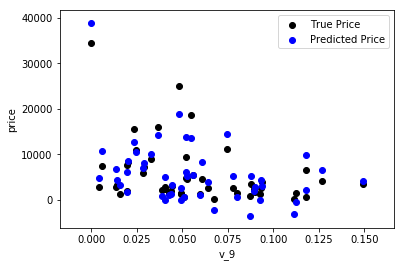

In [49]:
from matplotlib import pyplot as plt
subsample_index = np.random.randint(low=0, high=len(train_y), size=50)
plt.scatter(train_X['v_9'][subsample_index], train_y[subsample_index], color='black')
plt.scatter(train_X['v_9'][subsample_index], model.predict(train_X.loc[subsample_index]), color='blue')
plt.xlabel('v_9')
plt.ylabel('price')
plt.legend(['True Price','Predicted Price'],loc='upper right')
print('The predicted price is obvious different from true price')
plt.show()

In [50]:
##对y进行变换
train_y_ln = np.log(train_y + 1)

The transformed price seems like normal distribution


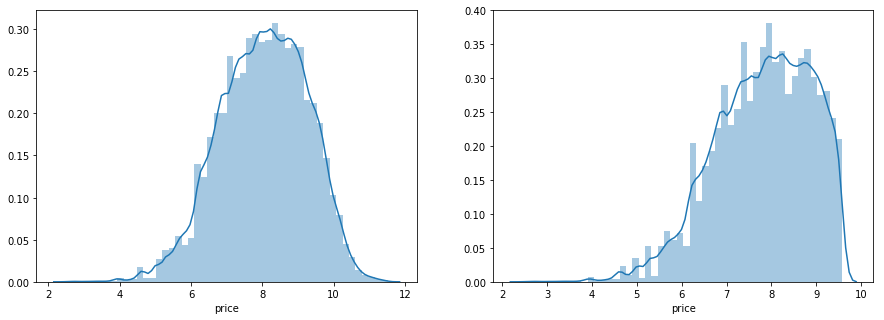

In [51]:
##画图查看
import seaborn as sns
print('The transformed price seems like normal distribution')
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(train_y_ln)
plt.subplot(1,2,2)
sns.distplot(train_y_ln[train_y_ln < np.quantile(train_y_ln, 0.9)])

In [52]:
##对y转换后建模
model = model.fit(train_X, train_y_ln)
print('intercept:'+ str(model.intercept_))
sorted(dict(zip(continuous_feature_names, model.coef_)).items(), key=lambda x:x[1], reverse=True)

intercept:30.52794706579824


[('v_1', 1.9559547569228914),
 ('v_2', 1.408390427174884),
 ('v_13', 0.3190099250461387),
 ('v_14', 0.05721157966773609),
 ('age', 0.006997201247498243),
 ('price_bodyType_gp_min', 0.0018727550512719706),
 ('power', 0.0010294282658764222),
 ('price_brand_gp_min', 6.486614834982483e-05),
 ('price_bodyType_gp_median', 3.445502541548861e-05),
 ('price_bodyType_gp_std', 3.0126870004289797e-05),
 ('price_brand_gp_mean', 1.131899905727412e-05),
 ('brand_gp_size', 1.5048096686158051e-06),
 ('price_bodyType_gp_max', 9.017234024333892e-07),
 ('price_brand_gp_max', 7.925860162308057e-07),
 ('bodyType_gp_size', -2.2857739948005054e-07),
 ('price_brand_gp_std', -4.284665134956804e-06),
 ('price_brand_gp_median', -1.117585542485213e-05),
 ('price_bodyType_gp_mean', -6.197633343157497e-05),
 ('age_bin', -0.0007841511910351297),
 ('kilometer', -0.008087484409603565),
 ('v_0', -0.03070337626577638),
 ('v_12', -0.2008532164771438),
 ('v_3', -0.2540469788809502),
 ('v_4', -0.3620665859561242),
 ('v_11',

The predicted price seems normal after np.log transforming


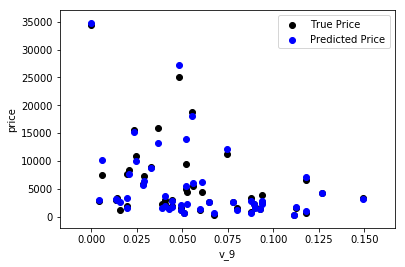

In [55]:
##再次可视化
plt.scatter(train_X['v_9'][subsample_index], train_y[subsample_index], color='black')
plt.scatter(train_X['v_9'][subsample_index], np.exp(model.predict(train_X.loc[subsample_index])), color='blue')
plt.xlabel('v_9')
plt.ylabel('price')
plt.legend(['True Price','Predicted Price'],loc='upper right')
print('The predicted price seems normal after np.log transforming')
plt.show()

### 五折交叉

In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, make_scorer

In [57]:
def log_transfer(func):
    def wrapper(y, yhat):
        result = func(np.log(y), np.nan_to_num(np.log(yhat)))
        return result
    return wrapper

In [59]:
##对未处理的五折
scores = cross_val_score(model, X=train_X, y=train_y, verbose=1, cv = 5)
print('AVG:', np.mean(scores))

AVG: 0.7366637625321608


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.3s finished


In [60]:
scores = cross_val_score(model, X=train_X, y=train_y_ln, verbose=1, cv = 5)
print('AVG:', np.mean(scores))

AVG: 0.935222568723787


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.2s finished


In [61]:
scores = pd.DataFrame(scores.reshape(1,-1))
scores.columns = ['cv' + str(x) for x in range(1, 6)]
scores.index = ['MAE']
scores

,cv1,cv2,cv3,cv4,cv5
MAE,0.934923,0.935149,0.935507,0.936995,0.93354


### 多种模型对比

In [62]:
train = sample_feature[continuous_feature_names + ['price']].dropna()
train_X = train[continuous_feature_names]
train_y = train['price']
train_y_ln = np.log(train_y + 1)

In [63]:
##嵌入式特征选择在学习器训练过程中自动地进行特征选择。嵌入式选择最常用的是L1正则化与L2正则化
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [64]:
models = [LinearRegression(),
Ridge(),
Lasso()]

In [66]:
result = dict()
for model in models:
    model_name = str(model).split('(')[0]
    scores = cross_val_score(model, X=train_X, y=train_y_ln, verbose=0, cv = 5)
    result[model_name] = scores
    print(model_name + ' is finished')

LinearRegression is finished
Ridge is finished
Lasso is finished


In [67]:
result = pd.DataFrame(result)
result.index = ['cv' + str(x) for x in range(1, 6)]
result

,LinearRegression,Ridge,Lasso
cv1,0.934923,0.933565,0.716851
cv2,0.935149,0.933483,0.708802
cv3,0.935507,0.933966,0.715487
cv4,0.936995,0.935306,0.723309
cv5,0.933540,0.931767,0.709205


intercept:30.527947060501216


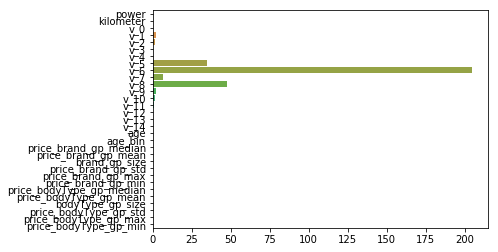

In [68]:
model = LinearRegression().fit(train_X, train_y_ln)
print('intercept:'+ str(model.intercept_))
sns.barplot(abs(model.coef_), continuous_feature_names)

intercept:8.604896111116814


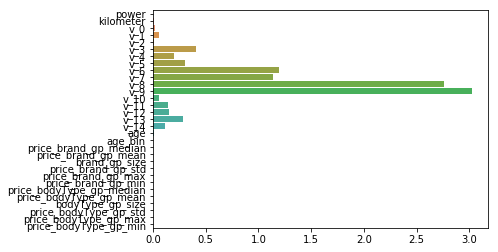

In [69]:
model = Ridge().fit(train_X, train_y_ln)
print('intercept:'+ str(model.intercept_))
sns.barplot(abs(model.coef_), continuous_feature_names)

intercept:8.125650299596265


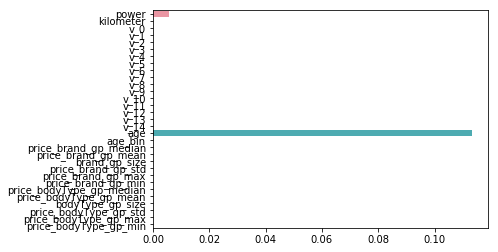

In [70]:
model = Lasso().fit(train_X, train_y_ln)
print('intercept:'+ str(model.intercept_))
sns.barplot(abs(model.coef_), continuous_feature_names)